<a href="https://colab.research.google.com/github/sumayabai/Hotel-Booking-EDA/blob/main/Hotel_Booking_Analysis_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#import neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import and read the dataset 
working_directory = '/content/drive/My Drive/EDA Project/'
#working_directory = '/content/drive/MyDrive/Colab Notebooks/Data science/Module 1/Hotel booking analysis/'  #shyam's working directory
df = pd.read_csv(working_directory + 'Hotel Bookings.csv')

FileNotFoundError: ignored

In [ ]:
#display the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Null Value Imputations**

In [ ]:
#to check how many missing data in the data set
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
#making a copy of the orginal dataset
booking_df = df.copy()

In [ ]:
#company and distribution_channel column will not be relevant for our data analysis purpose, so drop those columns.
booking_df.drop(['company','distribution_channel'],axis=1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#missing values for agent can be filled with 0.
booking_df['agent'] = booking_df['agent'].fillna(0)

In [ ]:
#missing values for country can be replaced with the mode value
# df['country'].value_counts()
booking_df['country'].fillna(booking_df.country.mode().to_string(), inplace=True)

In [ ]:
#replace the missing values of children column with the mode value

# df['children'].value_counts()
booking_df['children'] = booking_df['children'].fillna(0)


Exploratory Data Analysis :
a) Customer's Prefrences.
b) Booking Factors. 
c) Cancellation Insights. 

A) Customer's Prefrences :

###**What type of customers visited the most?**

In [ ]:
#Counting number of customer type
customer_type_df = booking_df['customer_type'].value_counts().reset_index().rename(columns={'index':'customer_type', 'customer_type': 'count'})
customer_type_df

,customer_type,count
0,Transient,89613
1,Transient-Party,25124
2,Contract,4076
3,Group,577


In [ ]:
# extracting number of customer type
cust_count_values = customer_type_df['count'].values
cust_count_values

array([89613, 25124,  4076,   577])

In [ ]:
# extracting customer type for labelling 
cust_type_labels = customer_type_df['customer_type'].values
cust_type_labels

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

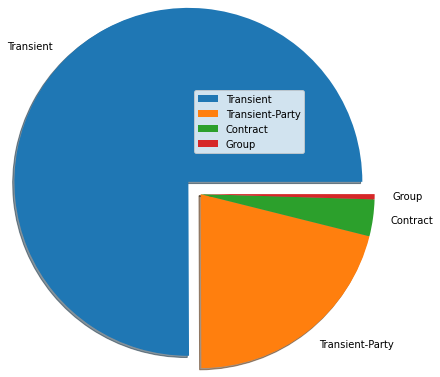

In [ ]:
#Ploting pie plot
myexplode = [0.2, 0, 0, 0]
plt.pie(cust_count_values, labels = cust_type_labels,radius = 2, explode= myexplode, shadow = True)
plt.legend()
plt.show() 



> So we can see here that **Transient** type of customer are the most frequent visitors



##**Find out the number of adults(or couples), family, group/friends**

In [ ]:
#extracting all boolean values from booking_df which has no children
no_chilren_bool= (booking_df['children'] == 0)

In [ ]:
#extracting all boolean values from booking_df which has no babies
no_babies_bool = (booking_df['babies'] == 0)

In [ ]:
# Extracting adults those have alteast one kid
family_count_df = booking_df.loc[~no_chilren_bool | ~no_chilren_bool,['adults','children', 'babies']]
family_count_df

,adults,children,babies
13,2,1.0,0
45,2,2.0,0
55,2,2.0,0
65,2,2.0,0
87,2,1.0,0
...,...,...,...
119270,2,1.0,0
119287,2,1.0,0
119293,2,2.0,0
119318,2,1.0,0


In [ ]:
#Calulating total number of adults those of kids
total_adults_in_family_count = family_count_df.adults.sum()
total_adults_in_family_count

16824

In [ ]:
#Calulating total number of kids
total_kids_in_family_count = family_count_df.children.sum() + family_count_df.babies.sum()
total_kids_in_family_count

12581.0

In [ ]:
#adding together total adults and kids
family_count = total_adults_in_family_count + total_kids_in_family_count
family_count

29405.0

In [ ]:
#Extracting adults those don't have any kids
adults_count_without_kids_df = booking_df.loc[no_chilren_bool & no_babies_bool]['adults'].value_counts().reset_index().rename(columns={'index':'number_of_members', 'adults': 'count'})

In [ ]:
adults_count_without_kids_df

,number_of_members,count
0,2,81560
1,1,22577
2,3,5666
3,0,180
4,4,59
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


In [ ]:
# Assigning name base on per adult count

for index,row in adults_count_without_kids_df.iterrows():
  if row['number_of_members'] == 1:
    adults_count_without_kids_df.at[index, 'label'] = "Single Person"
  elif row['number_of_members'] == 2:
    adults_count_without_kids_df.at[index, 'label'] =  "Mostly Couples"
  elif row['number_of_members'] >2:
    adults_count_without_kids_df.at[index, 'label'] =  "Group of Adults"
  else:
    adults_count_without_kids_df.at[index, 'label'] = 'No adults'

In [ ]:
adults_count_without_kids_df

,number_of_members,count,label
0,2,81560,Mostly Couples
1,1,22577,Single Person
2,3,5666,Group of Adults
3,0,180,No adults
4,4,59,Group of Adults
5,26,5,Group of Adults
6,27,2,Group of Adults
7,20,2,Group of Adults
8,5,2,Group of Adults
9,55,1,Group of Adults


In [ ]:
adults_count_without_kids_df = adults_count_without_kids_df.groupby('label').sum()
adults_count_without_kids_df

,number_of_members,count
label,,
Group of Adults,246,5741
Mostly Couples,2,81560
No adults,0,180
Single Person,1,22577


In [ ]:
# Drop number_of_members column as we don't need it
adults_count_without_kids_df.drop(labels='number_of_members', axis=1, inplace=True)
adults_count_without_kids_df

,count
label,
Group of Adults,5741
Mostly Couples,81560
No adults,180
Single Person,22577


In [ ]:
# found on dataset where there is no adults, there are no kids
adults_count_without_kids_df.drop(labels='No adults',inplace=True)
adults_count_without_kids_df

,count
label,
Group of Adults,5741
Mostly Couples,81560
Single Person,22577


In [ ]:
# creating new dataset
member_count_df = adults_count_without_kids_df.copy()

# Adding the Family count into the new data set
member_count_df.loc[len(adults_count_without_kids_df.index)] = [family_count]

In [ ]:
member_count_df

,count
label,
Group of Adults,5741.0
Mostly Couples,81560.0
Single Person,22577.0
3,29405.0


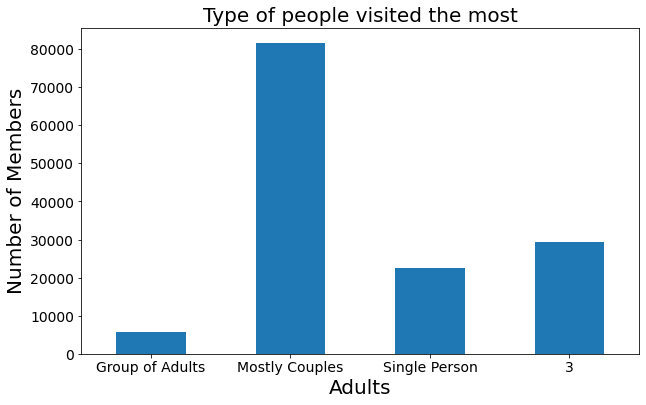

In [ ]:
# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

#Bar Graph
member_count_df['count'].plot.bar(fontsize = 14)
plt.title('Type of people visited the most', fontsize = 20)
plt.ylabel('Number of Members', fontsize = 20)
plt.xlabel('Adults', fontsize = 20)
plt.xticks(rotation=0)

plt.show()

> As we can see from the above graph, **Couples(or two person)** visits the hotel most





##**Preferred room type for most guest/customer**



In [ ]:
#Extracting room type and counting the total number
room_type = booking_df['reserved_room_type'].value_counts().reset_index().rename(columns= {'index':'reserved_room_type', 'reserved_room_type': 'count'})
room_type

,reserved_room_type,count
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6


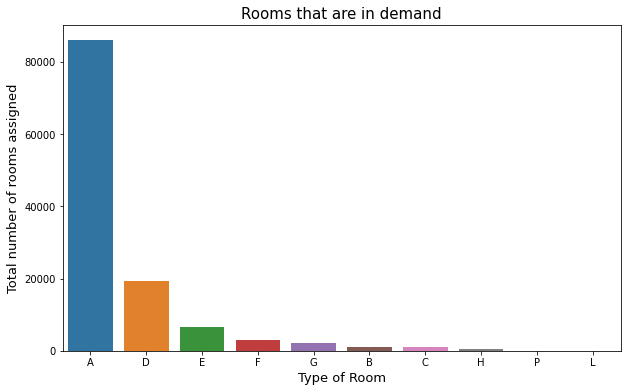

In [ ]:
# Bar graph
sns.barplot(x='reserved_room_type', y='count' ,data= room_type)
plt.title('Rooms that are in demand', fontsize = 15)
plt.ylabel('Total number of rooms assigned', fontsize = 13)
plt.xlabel('Type of Room', fontsize = 13)
plt.show()



> Specific room type is not mentioned in the dataset but we can say only one type of room is most people book and that is type **A**






##Find out which days are more busy: weekends or weekdays and how many nights they stayed




In [ ]:
booking_df[['stays_in_week_nights', 'stays_in_weekend_nights']]

,stays_in_week_nights,stays_in_weekend_nights
0,0,0
1,0,0
2,1,0
3,1,0
4,2,0
...,...,...
119385,5,2
119386,5,2
119387,5,2
119388,5,2


In [ ]:
week_nights_count_df = booking_df[booking_df['is_canceled'] == 0]['stays_in_week_nights'].value_counts().reset_index().rename(columns={'index': 'Week_nights', 'stays_in_week_nights':'count'})
week_nights_count_df

,Week_nights,count
0,1,20479
1,2,18810
2,3,13753
3,5,7216
4,4,6068
5,0,5732
6,6,917
7,10,741
8,7,706
9,8,436


In [ ]:
booking_df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
weekend_nights_count_df = booking_df[booking_df['is_canceled'] == 0]['stays_in_weekend_nights'].value_counts().reset_index().rename(columns={'index': 'Weekend_nights', 'stays_in_weekend_nights':'count'})
weekend_nights_count_df

,Weekend_nights,count
0,0,32497
1,2,20823
2,1,19619
3,4,1257
4,3,815
5,6,66
6,5,36
7,8,26
8,7,5
9,10,5


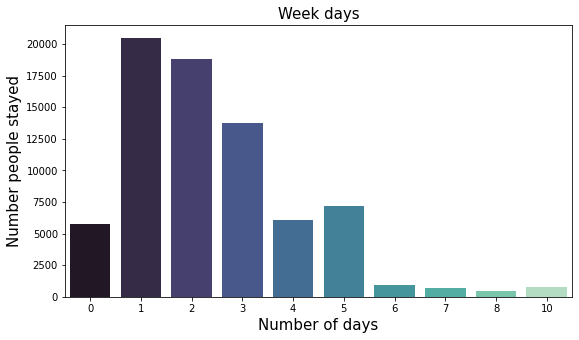

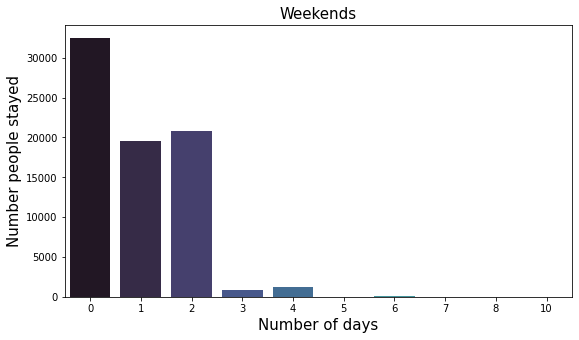

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)

plt.subplot(1, 2, 1)

sns.barplot(x=week_nights_count_df['Week_nights'][0:10], y= week_nights_count_df['count'], palette='mako')
plt.title('Week days', fontsize = 15)
plt.xlabel('Number of days', fontsize = 15)
plt.ylabel('Number people stayed', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)

sns.barplot(x=weekend_nights_count_df['Weekend_nights'][0:10], y= weekend_nights_count_df['count'], palette='mako')

plt.title('Weekends', fontsize = 15)
plt.xlabel('Number of days', fontsize = 15)
plt.ylabel('Number people stayed', fontsize = 15)

plt.show()



> Here we are assuming Number of days with **0** count means guest stayed for **few hours** and not a whole day.

> By studying both the graph we can see **Weekends are more busy** and usually **people stays in a hotel for less than 5 days.**





## Find out if hotels with parking facility has more number of customers or not




In [ ]:
booking_df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [ ]:
hotel_parking_df = booking_df[['hotel','arrival_date_year', 'required_car_parking_spaces']]
hotel_parking_df

,hotel,arrival_date_year,required_car_parking_spaces
0,Resort Hotel,2015,0
1,Resort Hotel,2015,0
2,Resort Hotel,2015,0
3,Resort Hotel,2015,0
4,Resort Hotel,2015,0
...,...,...,...
119385,City Hotel,2017,0
119386,City Hotel,2017,0
119387,City Hotel,2017,0
119388,City Hotel,2017,0


In [ ]:
hotel_with_parking_df = hotel_parking_df[hotel_parking_df['required_car_parking_spaces'] != 0][['hotel','arrival_date_year', 'required_car_parking_spaces']]
hotel_with_parking_df

,hotel,arrival_date_year,required_car_parking_spaces
25,Resort Hotel,2015,1
29,Resort Hotel,2015,1
53,Resort Hotel,2015,1
54,Resort Hotel,2015,1
55,Resort Hotel,2015,1
...,...,...,...
119158,City Hotel,2017,1
119198,City Hotel,2017,1
119236,City Hotel,2017,1
119281,City Hotel,2017,1


In [ ]:
hotel_parking_count = hotel_with_parking_df[['hotel']].value_counts().reset_index().rename(columns={0:'count'})
hotel_parking_count

,hotel,count
0,Resort Hotel,5490
1,City Hotel,1926


In [ ]:
hotel_without_parking_df = hotel_parking_df[hotel_parking_df['required_car_parking_spaces'] == 0]
hotel_without_parking_df.head()

,hotel,arrival_date_year,required_car_parking_spaces
0,Resort Hotel,2015,0
1,Resort Hotel,2015,0
2,Resort Hotel,2015,0
3,Resort Hotel,2015,0
4,Resort Hotel,2015,0


In [ ]:
hotel_without_parking_count = hotel_without_parking_df[['hotel']].value_counts().reset_index().rename(columns={0:'count'})
hotel_without_parking_count

,hotel,count
0,City Hotel,77404
1,Resort Hotel,34570


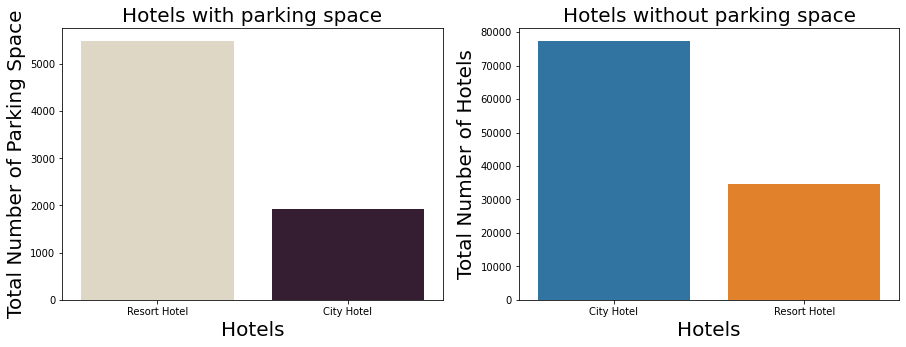

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

plt.subplot(1, 2, 1)
sns.barplot(x=hotel_parking_count['hotel'], y=hotel_parking_count['count'], palette="ch:.30")
plt.title('Hotels with parking space', fontsize = 20)
plt.ylabel('Total Number of Parking Space', fontsize = 20)
plt.xlabel('Hotels', fontsize = 20)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.barplot(x=hotel_without_parking_count['hotel'], y=hotel_without_parking_count['count'])
plt.title('Hotels without parking space', fontsize = 20)
plt.ylabel('Total Number of Hotels', fontsize = 20)
plt.xlabel('Hotels', fontsize = 20)
plt.xticks(rotation=0)
plt.show()



> Hotels **without Parking space** has more number of customer



## Which month receives more number of special request each year?

In [ ]:
special_request = booking_df[booking_df['total_of_special_requests'] != 0][['arrival_date_year','arrival_date_month','total_of_special_requests']]
special_request

,arrival_date_year,arrival_date_month,total_of_special_requests
4,2015,July,1
5,2015,July,1
7,2015,July,1
8,2015,July,1
12,2015,July,3
...,...,...,...
119380,2017,August,1
119384,2017,August,2
119386,2017,August,2
119387,2017,August,4


In [ ]:
special_request_of_2015 = booking_df[(booking_df['arrival_date_year'] == 2015) & (booking_df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_request_of_2015.head()

,arrival_date_month,total_of_special_requests
4,July,1
5,July,1
7,July,1
8,July,1
12,July,3


In [ ]:
# Sorting months month-wise
months = special_request_of_2015['arrival_date_month'].unique()
special_request_of_2015['arrival_date_month'] = pd.Categorical(special_request_of_2015['arrival_date_month'], categories=months, ordered=True)

In [ ]:
special_request_2015_month_wise = special_request_of_2015.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()


special_request_2015_month_wise

,arrival_date_month,total_of_special_requests
0,July,1226
1,August,2188
2,September,1869
3,October,1953
4,November,950
5,December,1392


In [ ]:
special_request_of_2016 = booking_df[(booking_df['arrival_date_year'] == 2016) & (booking_df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_request_of_2016.head()

,arrival_date_month,total_of_special_requests
3738,January,1
3739,January,1
3740,January,1
3741,January,2
3743,January,1


In [ ]:
# Sorting months
months = special_request_of_2016['arrival_date_month'].unique()
special_request_of_2016['arrival_date_month'] = pd.Categorical(special_request_of_2016['arrival_date_month'], categories=months, ordered=True)

In [ ]:
special_request_2016_month_wise = special_request_of_2016.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
special_request_2016_month_wise

,arrival_date_month,total_of_special_requests
0,January,988
1,February,1622
2,March,2079
3,April,2223
4,May,2342
5,June,2633
6,July,3039
7,August,3454
8,September,3399
9,October,3563


In [ ]:
special_request_of_2017 = booking_df[(booking_df['arrival_date_year'] == 2017) & (booking_df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_request_of_2017.head()

,arrival_date_month,total_of_special_requests
9776,January,1
9777,January,1
9778,January,1
9779,January,1
9780,January,1


In [ ]:
# Sorting months
months = special_request_of_2017['arrival_date_month'].unique()
special_request_of_2017['arrival_date_month'] = pd.Categorical(special_request_of_2017['arrival_date_month'], categories=months, ordered=True)

In [ ]:
special_request_2017_month_wise = special_request_of_2017.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
special_request_2017_month_wise

,arrival_date_month,total_of_special_requests
0,January,2258
1,February,2619
2,March,2793
3,April,3560
4,May,3938
5,June,3536
6,July,4240
7,August,4581


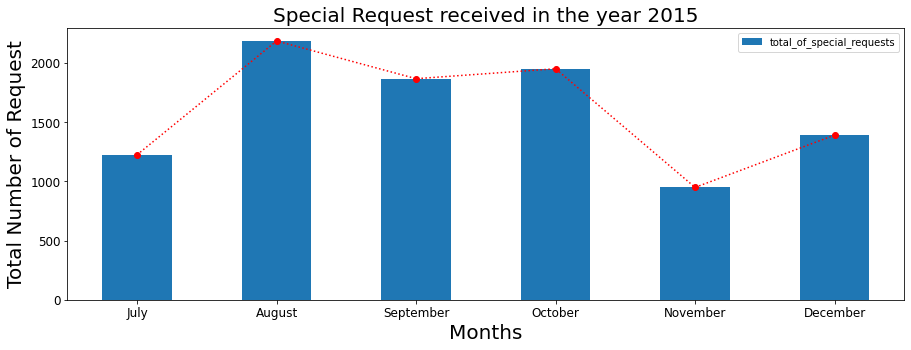

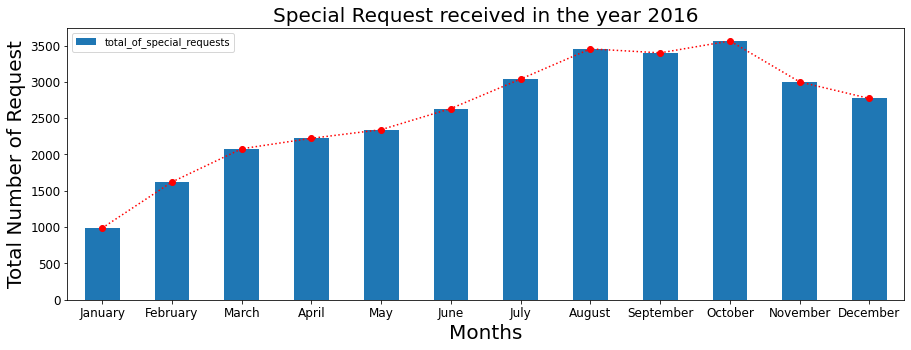

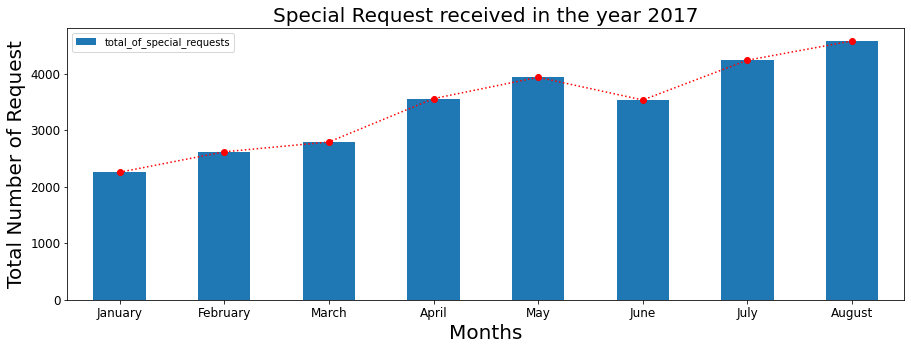

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)

special_request_2015_month_wise.plot.bar(x= 'arrival_date_month', y='total_of_special_requests', fontsize = 12)
plt.plot('total_of_special_requests','o:r', data= special_request_2015_month_wise)


plt.title('Special Request received in the year 2015', fontsize = 20)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Total Number of Request', fontsize = 20)
plt.xticks(rotation=0)
plt.show()

special_request_2016_month_wise.plot.bar(x= 'arrival_date_month', y='total_of_special_requests', fontsize = 12)
plt.plot('total_of_special_requests','o:r', data= special_request_2016_month_wise)


plt.title('Special Request received in the year 2016', fontsize = 20)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Total Number of Request', fontsize = 20)
plt.xticks(rotation=0)
plt.show()


special_request_2017_month_wise.plot.bar(x= 'arrival_date_month', y='total_of_special_requests', fontsize = 12)
plt.plot('total_of_special_requests','o:r', data= special_request_2017_month_wise)


plt.title('Special Request received in the year 2017', fontsize = 20)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Total Number of Request', fontsize = 20)
plt.xticks(rotation=0)
plt.show()



> Hotel receives special request more during the months of August, September & October.



## What is the most preferred meal for every guest?


In [ ]:
meal_count_df = booking_df.meal.value_counts().reset_index().rename(columns={'index': 'meal', 'meal': 'count'})
meal_count_df

,meal,count
0,BB,92310
1,HB,14463
2,SC,10650
3,Undefined,1169
4,FB,798


In [ ]:
#drop undefined from row
meal_count_df.drop(labels=3, axis=0, inplace=True)

In [ ]:
meal_count_df

,meal,count
0,BB,92310
1,HB,14463
2,SC,10650
4,FB,798


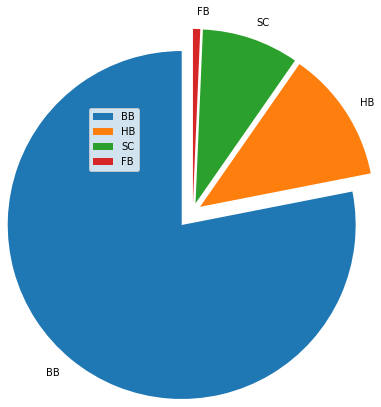

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)

meal_count_labels = meal_count_df['meal']
myexplode = [0.2, 0.1, 0.1, 0.1]
plt.pie(meal_count_df['count'], labels = meal_count_labels, radius = 2,startangle= 90,explode = myexplode)

plt.legend()
plt.show() 

**B) Booking Factors :**


**1)To check the trend on which hotels type is prefreed the most;City hotel or resort hotel**

Text(0, 0.5, 'Count')

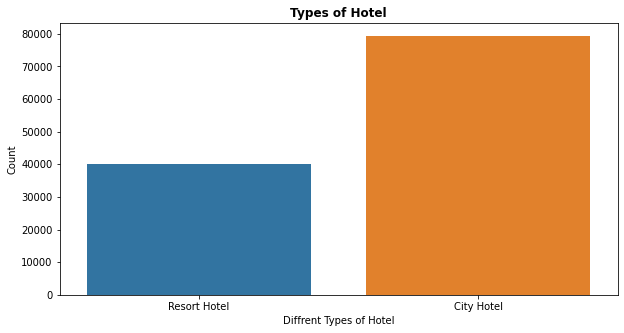

In [ ]:
booking_df['hotel'].value_counts(normalize= True)*100

plt.figure(figsize=(10,5))
ax = sns.countplot(x="hotel", data=booking_df)
plt.title('Types of Hotel',weight='bold')
plt.xlabel('Diffrent Types of Hotel')
plt.ylabel('Count')



The Above graph depicts information about which hotel type has occupied more guests.

It's clear from the graph that city hotel was more occupied than the resort hotel.



**2)Which is the busiest year and the month? Which is the best time in the year to book a hotel?**

In [ ]:
booking_df['arrival_date_month'].value_counts(normalize =True)*100

August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

In [ ]:
#Create a new list to store the months in chrnological order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
# USING PD.CATEGORICAL() to reorder the months.(It sorts the variable in the logical order)
booking_df['arrival_date_month'] = pd.Categorical(booking_df['arrival_date_month'], categories=months, ordered=True)

Text(0, 0.5, 'Count')

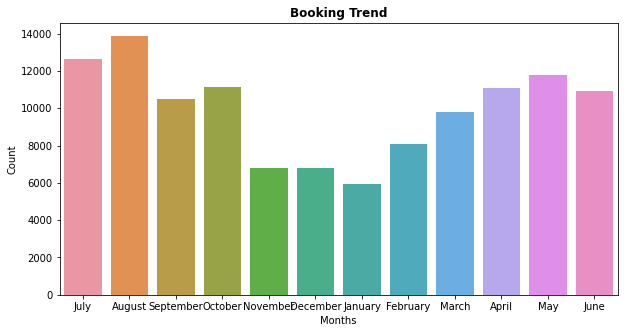

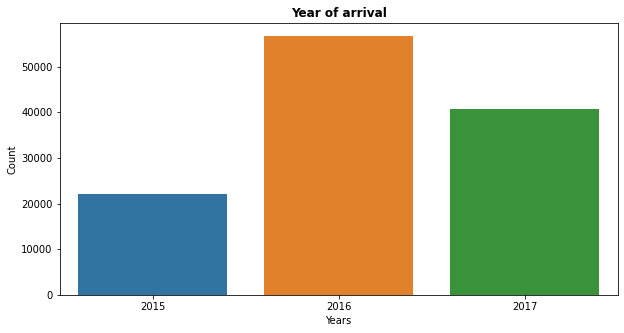

In [ ]:
#using a countplot to display the booking trend by months.
plt.figure(figsize=(10,5)) #figure_size
sns.countplot(x="arrival_date_month", data=df)  #column_name, dataframe
plt.title('Booking Trend',weight='bold')  #title of the graph
plt.xlabel('Months')  #title of x axis
plt.ylabel('Count')   #titleof y axis

plt.figure(figsize=(10,5))
ax = sns.countplot(x="arrival_date_year", data=df)
plt.title('Year of arrival',weight='bold')
plt.xlabel('Years')
plt.ylabel('Count')

1)The above graphs tell us about the trend of hotels occupied in the various months and years.
2)It can be depicted from the graph that the busiset month are July and August wheras January and December are off seasons.
3)From the dataset given, the year 2016 had more guests than 2015 and 2017

**Check the booking trend for both types of hotels**

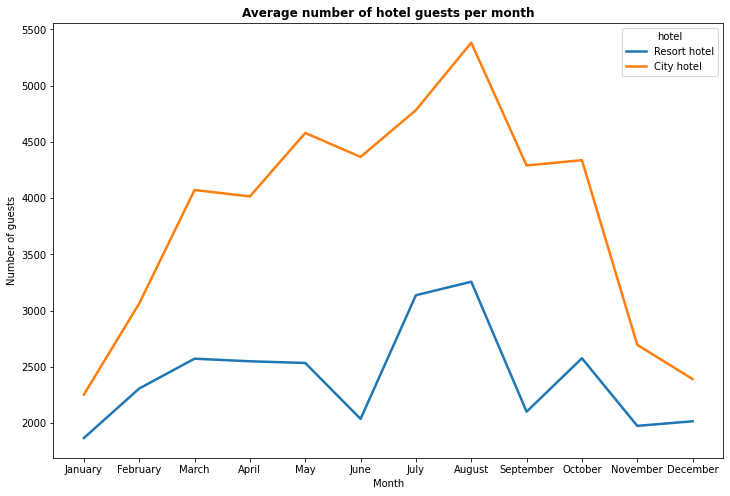

In [ ]:
#seperate the resort and city data into a new dataset, and take only the not canceled bookings.
resort=booking_df[(booking_df["hotel"]=="Resort Hotel")&(booking_df["is_canceled"]==0)]
city=booking_df[(booking_df["hotel"]=="City Hotel")&(booking_df["is_canceled"]==0)]
#to check the guests in resort hotel
resort_guests= resort.groupby("arrival_date_month")["hotel"].count()
resort_guests
#to check the guests in city hotel
city_guests= city.groupby("arrival_date_month")["hotel"].count()
city_guests

#create a new dataset with list of values for each months months for resort hotel
resort_guests_df = pd.DataFrame({"month": list(resort_guests.index),"hotel": "Resort hotel", "guests": list(resort_guests.values)})
#create a new dataset with list of values for each months months for city hotel
city_guests_df = pd.DataFrame({"month": list(city_guests.index),"hotel": "City hotel", "guests": list(city_guests.values)})

#concat both the data,to get the full guests data
combined_guests_df = pd.concat([resort_guests_df,city_guests_df])

#reorder the months
#Create a new list to store the months in chrnological order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
# USING PD.CATEGORICAL() to reorder the months.(It sorts the variable in the logical order)
booking_df['arrival_date_month'] = pd.Categorical(booking_df['arrival_date_month'], categories=months, ordered=True)

#plot the new data into a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=combined_guests_df, 
              size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month",weight ='bold')
plt.xlabel("Month")
plt.ylabel("Number of guests")
plt.show()

1)The above graphs shows the booking trend classified on the types of hotels.
2)August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

**3)Is there a significant diffrence in the ADR(Average Daily Rate) during peak seasons and off seasons?**

In [ ]:
booking_df['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

In [ ]:
#grouping the adr with that of the months.
booking_df.groupby('arrival_date_month')['adr']

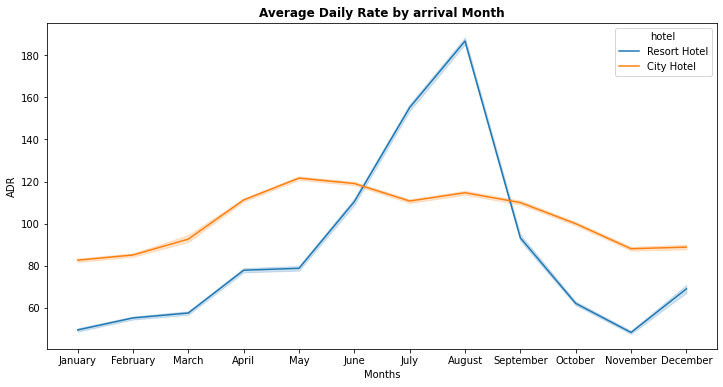

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= booking_df)
plt.title('Average Daily Rate by arrival Month',weight='bold')
plt.xlabel('Months')
plt.ylabel('ADR')
plt.show()

It can be infered from the plot that, Average daily rate(ADR) is higher during the peak seasons(July,August) and ADR is lower during off seasons.
The above diffrence is true for both city hotel as well as resort hotel.

**4)The country that has most number of guests**

In [ ]:
#taking the top 10 countries from the list
booking_df['country'].value_counts(normalize = True)[:10]

PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
ITA    0.031544
IRL    0.028269
BEL    0.019616
BRA    0.018628
NLD    0.017623
Name: country, dtype: float64

Text(0, 0.5, 'Count')

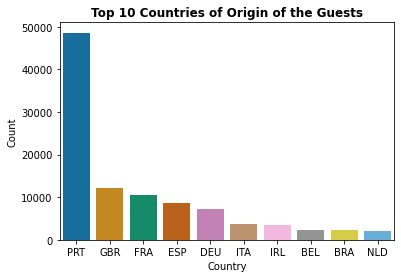

In [ ]:
sns.countplot(x='country', data=booking_df,order=pd.value_counts(booking_df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')

The above graph depicts the information about the natinality of the customers.
It is depicted from the graph that most of the customers are from Portugal.

**5)The mode of booking(market segment(TA ,TO,Direct_booking)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


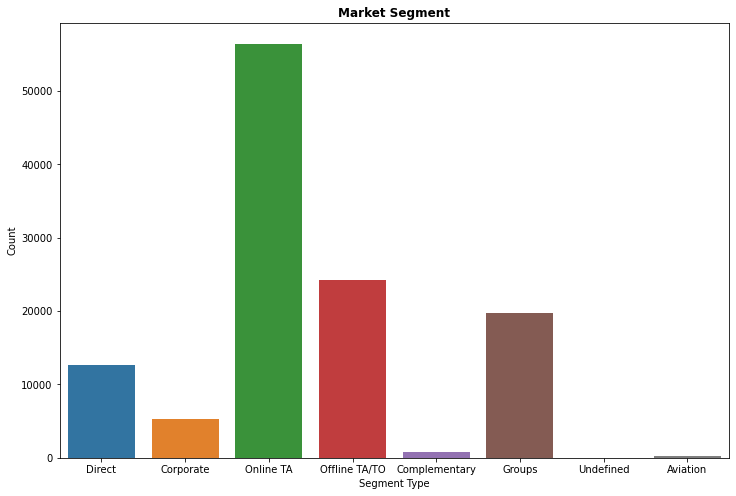

In [ ]:
booking_df['market_segment'].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(df['market_segment'])
plt.title('Market Segment', weight='bold')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.show()

The above graph tells us about the mode of booking chose by customers.
It is clear that most of the customers book through Online Travel Agents(TA)followed by offline Travel Agents(TA) and Tour Operators(TO).

# C. Cancellation Insights

In [ ]:
import datetime

In [ ]:
df['date'] = df.apply(lambda row: datetime.datetime.strptime(str(row['arrival_date_year'])+'-'+row['arrival_date_month']+'-'+str(row['arrival_date_day_of_month']), '%Y-%B-%d'),axis=1)

75166
44224
              counts  percentage
Not_canceled   75166       62.96
canceled       44224       37.04


<BarContainer object of 2 artists>

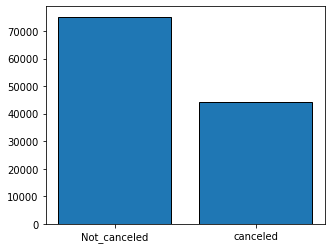

In [ ]:
df_0 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts'])
#print(df2)
def percentage(val):
  print(val)
  return round((val*100)/df_0['counts'].sum(),2)

df_0['percentage'] = df_0.apply(lambda x: percentage(x[1]),axis=1 )
df_0 = df_0.drop('values',axis=1)
print(df_0)
plt.figure(figsize=(5,4)) # does not affect the following plot
plt.bar(list(df_0.index),list(df_0['counts']),0.8,ec='black')



,index,values,counts
0,Not_canceled,0,75166
1,canceled,1,44224


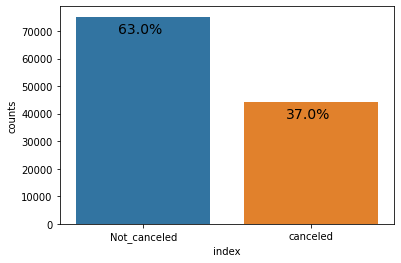

In [ ]:
df_0 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts']).reset_index()
df_0
counts = df_0.counts.to_list()
def percent(x):
  return round(100*(x/sum(counts)),1)
sns.barplot(x='index',y='counts',data=df_0)
for i in range(0,2):
  plt.text(i-0.15,counts[i]-6000,str(percent(counts[i]))+'%',fontsize=14)
df_0

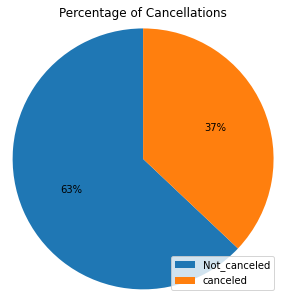

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df_0.counts,radius=1.2,autopct='%1.0f%%',startangle=90,labeldistance=0.28)#labels = df2['index'],
plt.title('Percentage of Cancellations')
plt.legend(labels=df_0['index'],loc='lower right')

plt.show()

###We noticed that 37% of the total bookings got canceled.

## 1.Type of hotel

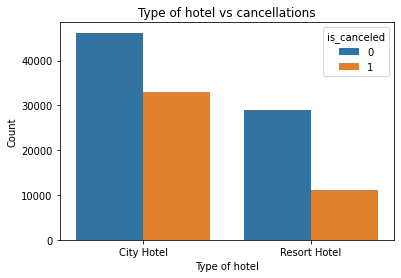

In [ ]:
df_1 = pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
df_1 = df_1.rename(columns={"is_canceled": "count"})
df_1 = df_1.reset_index()
df_1
sns.barplot(x='hotel',y='count',hue='is_canceled',data=df_1)
plt.title('Type of hotel vs cancellations')
plt.xlabel('Type of hotel')
plt.ylabel('Count')
#plt.legend(['a','b'])
plt.show()


In [ ]:
df_11 = pd.DataFrame(df.groupby('hotel')['is_canceled'].mean()*100)
df_11

,is_canceled
hotel,
City Hotel,41.726963
Resort Hotel,27.763355


### We noticed that city hotels had higher rate of cancellations of 42% and resort hotels has a lower rate of cancellations of 28%

We can conclude that people book city hotels more and also tend to cancel it easily, and people book resort hotels less but once book they do not cancel it easily.

##2.How does customer type effect cancellations?


No handles with labels found to put in legend.


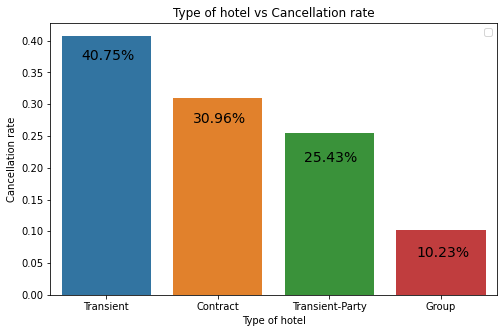

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y='is_canceled',x='customer_type', data=df, ci=None)#, hue='is_canceled')
percentage = df.groupby('customer_type')['is_canceled'].mean().to_list()
percentage = sorted(percentage,reverse=True)
for i in range(0,4):
  plt.text(i-0.225,round(percentage[i],2)-0.04,str(round(percentage[i]*100,2))+'%',fontsize=14)
plt.title('Type of hotel vs Cancellation rate', loc='center')
plt.xlabel('Type of Customer')
plt.ylabel('Cancellation rate')
plt.legend()
plt.show()

In [ ]:
df_2 = pd.DataFrame(df.groupby('customer_type')['is_canceled'].value_counts())
df_2 = df_2.rename(columns={"is_canceled": "count"})
df_2 = df_2.reset_index()


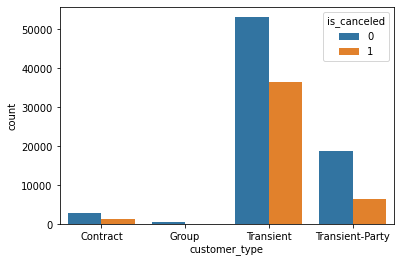

In [ ]:
sns.barplot(x='customer_type',y='count',hue='is_canceled',data=df_2)


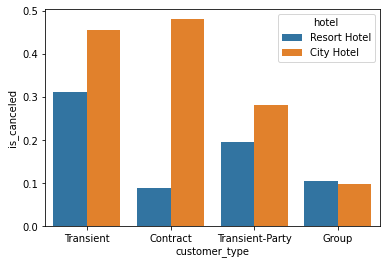

In [ ]:
sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)
#sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)

### Transient type customers have highest cancellation rate and Group customers have least cancellation rate and Contract and Transient-Party type were intermediate.

##3.Variation of tendancy to cancellation over the months of the year.

In [ ]:
def compliment(a):
  if a == 0:
    return 1
  else :
    return 0
df['is_not_canceled'] = df.is_canceled.apply(lambda x: compliment(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


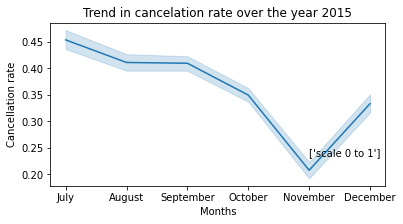

In [ ]:
df_31 = df[df.arrival_date_year == 2015]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(6,3))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2015')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


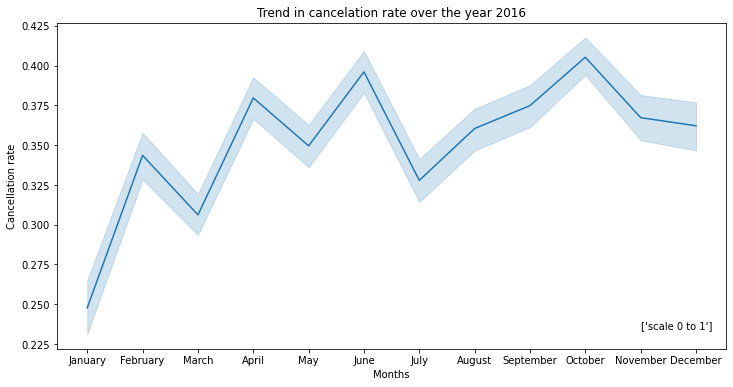

In [ ]:
df_31 = df[df.arrival_date_year == 2016]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(12,6))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2016')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


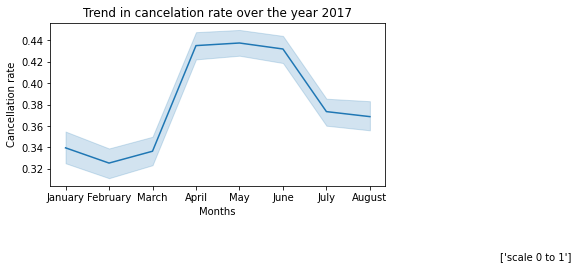

In [ ]:
df_31 = df[df.arrival_date_year == 2017]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(6,3))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the year 2017')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

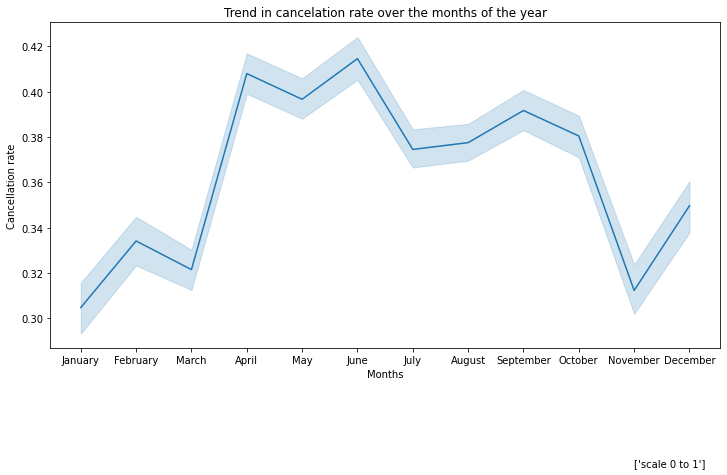

In [ ]:
df_31 = df
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_31['arrival_date_month'] = pd.Categorical(df_31['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(12,6))

sns.lineplot(x='arrival_date_month', y='is_canceled', data=df_31)
plt.title('Trend in cancelation rate over the months of the year')
plt.xlabel('Months')
plt.ylabel('Cancellation rate')
plt.text(10,0.235,['scale 0 to 1'])
plt.show()

## 4.Does the change no of booking changes affect the cancellation?

In [ ]:
df.booking_changes.value_counts()[:10]


0    101314
1     12701
2      3805
3       927
4       376
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64

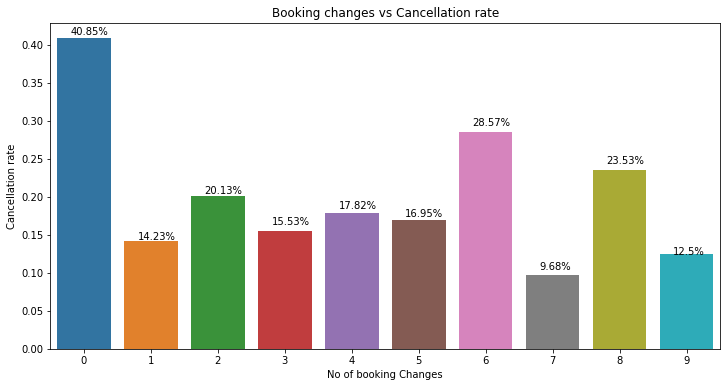

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(x='booking_changes',y='is_canceled',data=df,order=pd.value_counts(df['booking_changes']).iloc[:10].index, ci=None)
percentage = df.groupby('booking_changes')['is_canceled'].mean().to_list()
for i in range(0,10):
  plt.text(i-0.2,round(percentage[i],2)+0.004,str(round(percentage[i]*100,2))+'%',fontsize=10)
plt.title('Booking changes vs Cancellation rate')
plt.xlabel('No of booking Changes')
plt.ylabel('Cancellation rate')
plt.show()

### We can notice that the cancellation rate was lower when the customers were allowed for changes

Being liberal on allowing customers to change thier bookings can help in reducing the cancellation rate. However it is better to limit is to 5. 

##5.If the assigned room is not same as reserved room?

In [ ]:
df['same_room_assigned'] = np.where(df.reserved_room_type==df.assigned_room_type, 1 , 0)
#df['col3'] = np.where(df['age'] <= 9, 'child', df['sex'])


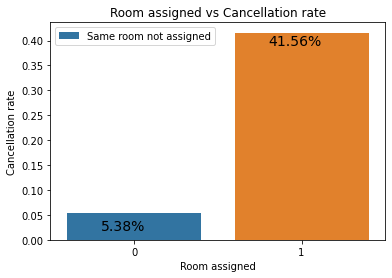

In [ ]:
sns.barplot(x='same_room_assigned', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('same_room_assigned')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.2,round(percentage[i],2)-0.03,str(round(percentage[i]*100,2))+'%',fontsize=14)
plt.title('Room assigned vs Cancellation rate')
plt.xlabel('Room assigned')
plt.ylabel('Cancellation rate')
plt.legend(['Same room not assigned'])
plt.show()


### We noticed that when same room was not assigned, the cancellation rate was very low.It implies Assigning a better room drastically reduce the cancellation rate. 

Assigning a better room drastically reduce the cancellation rate. So, if possible we offer a better room when the customer is planning to cancel the booking. 

## 6.Cancellation rate based on deposit type 

In [ ]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

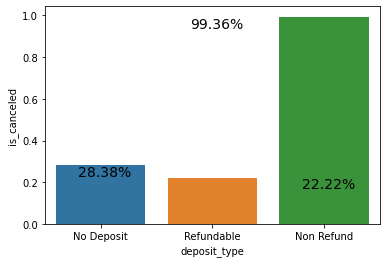

In [ ]:
sns.barplot(x='deposit_type', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('deposit_type')['is_canceled'].mean().to_list()
for i in range(0,3):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)

### Not Insights

In [ ]:
df.groupby('deposit_type')['is_canceled'].value_counts()


deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

## 7.Variation in of cancellation based on market segment.

In [ ]:
#df_7 = df[df.market_segment!='Undefined']
df_7 = df.drop(df.loc[df['market_segment']=='Undefined'].index,)
print(df.shape,df_7.shape)

(119390, 35) (119388, 35)


In [ ]:
market_segment_df = df_7['market_segment'].value_counts().reset_index().rename(columns={'index':'market_segment', 'market_segment': 'count'})
market_segment_df = market_segment_df.head(7)
market_segment_df

,market_segment,count
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237


In [ ]:
# extracting number of customer type
market_segment_values = market_segment_df['count'].values
market_segment_values

array([56477, 24219, 19811, 12606,  5295,   743,   237])

In [ ]:
# extracting customer type for labelling 
market_segment_labels = market_segment_df['market_segment'].values
market_segment_labels

array(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate',
       'Complementary', 'Aviation'], dtype=object)

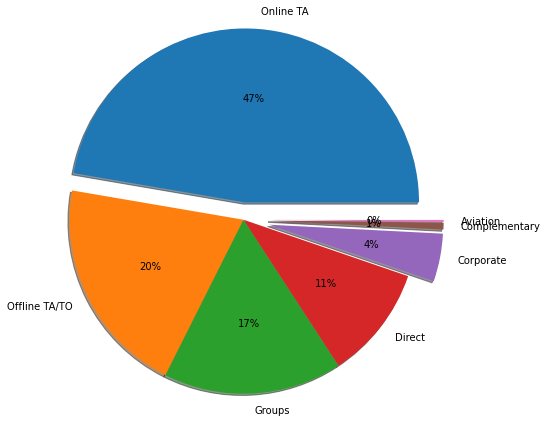

In [ ]:
#Ploting pie plot
myexplode = [0.2, 0, 0, 0,0.3,0.3,0.3]
plt.pie(market_segment_values, labels = market_segment_labels,radius = 2,autopct='%1.0f%%', explode=myexplode, shadow = True)
plt.show() 

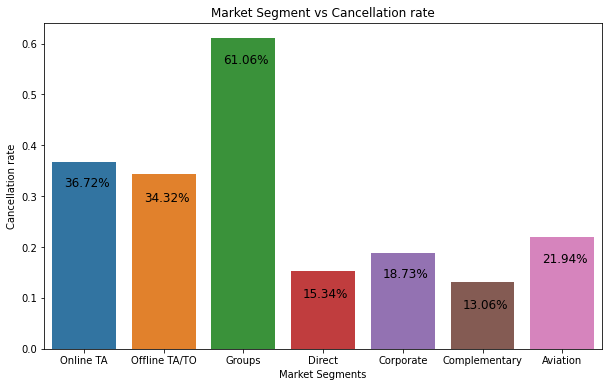

In [ ]:
List = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate','Complementary', 'Aviation']
df['market_segment'] = pd.Categorical(df['market_segment'], categories=List, ordered=True)
plt.figure(figsize=(10,6))
sns.barplot(x='market_segment', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('market_segment')['is_canceled'].mean().to_list()
for i in range(0,7):
  plt.text(i-0.25,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=12)

plt.title('Market Segment vs Cancellation rate')
plt.xlabel('Market Segments')
plt.ylabel('Cancellation rate')
plt.show()


### The customers who come from grouped market segments have a very high cancellation rate and direct and complimentary customers had the least cancellation rate. 

## 8.How often does the repeated guest cancel the booking?

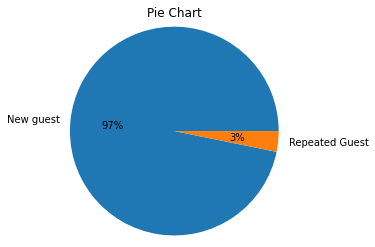

In [ ]:

is_repeated = df.is_repeated_guest.value_counts().tolist()
plt.pie(is_repeated, labels=['New guest','Repeated Guest'], radius=1.2, autopct='%1.0f%%')
plt.title('Pie Chart')
plt.show()

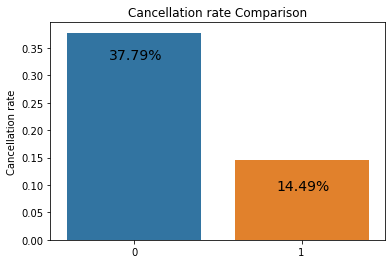

In [ ]:
sns.barplot(x='is_repeated_guest', y = 'is_canceled', data=df, ci=None)

percentage = df.groupby('is_repeated_guest')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.15,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)
#sns.set_xticklabel(['New guest','Repeated Guest'])
plt.title('Cancellation rate Comparison')
plt.ylabel('Cancellation rate')
plt.xlabel('  ')
plt.show()

### The number of repeated guests are low, but the repeated guests have a very low rate of cancelations. 


Coming up with a stragies to change a new customer into retuning customer is one of the key ways to reduce the cancellation rate. 

## 9.Does special requests decrease the cancellation rate?

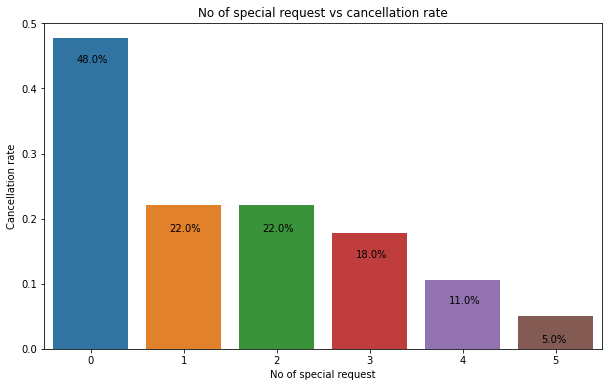

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='total_of_special_requests', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('total_of_special_requests')['is_canceled'].mean().to_list()
for i in range(0,6):
  plt.text(i-0.15,round(percentage[i],2)-0.04,str(round(percentage[i],2)*100)+'%',fontsize=10)
plt.title('No of special request vs cancellation rate')
plt.xlabel('No of special request')
plt.ylabel('Cancellation rate')
plt.show()


### We notice that the cancellation rates are much lower if there are special requests. 

Marketing campigns must specify on the options we provide for special books so has to attract more of such bookings that can have lower cancellations rates.

## 10.Which type of meal type bookings have highest cancellation rate?

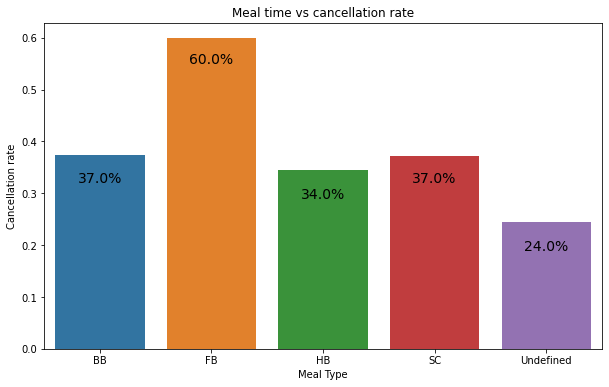

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='meal', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('meal')['is_canceled'].mean().to_list()
for i in range(0,5):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i],2)*100)+'%',fontsize=14)
plt.title('Meal time vs cancellation rate')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation rate')
#plt.legend(['Bed & Breakfast',' Full Board','Half Board','SC','Unknown'])
plt.show()

In [ ]:
### We noticed that Full board bookings had the hight rate of cancellations and other meal type showed a simliar rate. 